<a href="https://colab.research.google.com/github/varunraj42/CodeBasics/blob/DataScience/Logisitc_Reg_BinaryClass_CodeBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
os.chdir('/content/gdrive/MyDrive/')
# os.makedirs('CodeBasics')
os.listdir('CodeBasics')
os.chdir('/content/gdrive/MyDrive/CodeBasics')

In [6]:
data_file = 'HR_comma_sep.csv'

In [20]:
data = pd.read_csv(data_file, header=0)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Attrition Stats. Based on Total Projects

In [35]:
total_projects = data.number_project.unique().tolist()
total_projects.sort()
data_left = [(len(data.loc[(data.number_project==total) & (data.left==1)])/len(data))*100 for total in total_projects]
data_stay = [(len(data.loc[(data.number_project==total) & (data.left==0)])/len(data))*100 for total in total_projects]

In [36]:
X = np.arange(len(data_left))

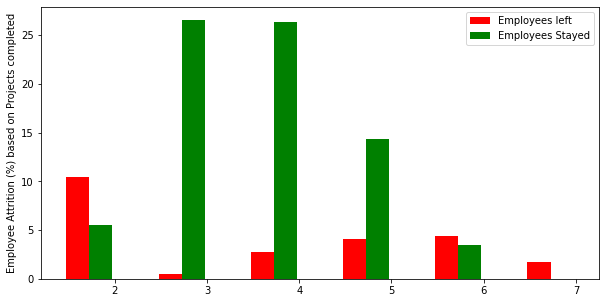

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(X, data_left, color='red', width=0.25)
plt.bar(X+0.25, data_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(total_projects))], total_projects)
plt.ylabel('Employee Attrition (%) based on Projects completed')
plt.legend(['Employees left', 'Employees Stayed'])

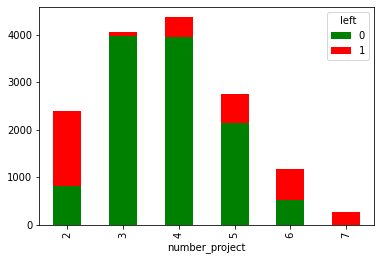

In [41]:
pd.crosstab(data.number_project, data.left).plot(kind='bar', stacked=True, color=['green', 'red'])

### Employees who completed (2,6,7) number of projects are highly likely to leave.

> Indented block



# Attrition Stats. Based on Tenure

In [28]:
tenure_cat = data.time_spend_company.unique().tolist()
tenure_cat.sort()
data_left = [(len(data.loc[(data.time_spend_company==tenure) & (data.left==1)])/len(data))*100 for tenure in tenure_cat]
data_stay = [(len(data.loc[(data.time_spend_company==tenure) & (data.left==0)])/len(data))*100 for tenure in tenure_cat]

In [29]:
X = np.arange(len(data_left))

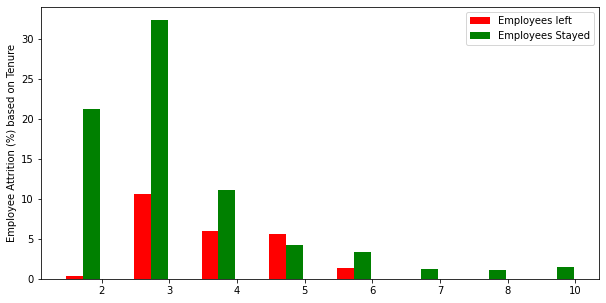

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(X, data_left, color='red', width=0.25)
plt.bar(X+0.25, data_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(tenure_cat))], tenure_cat)
plt.ylabel('Employee Attrition (%) based on Tenure')
plt.legend(['Employees left', 'Employees Stayed'])

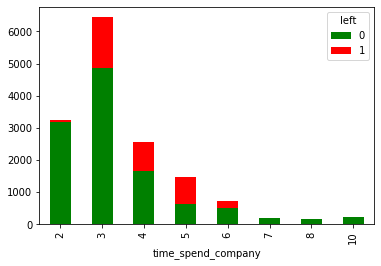

In [34]:
pd.crosstab(data.time_spend_company, data.left).plot(kind='bar', stacked=True, color=['green','red'])

### Employees in Tenure-Range of (3,4,5) are highly likely to leave

> Indented block



# Attrition Stats. Based on Salary

In [10]:
sal_ranges = data.salary.unique().tolist()
data_left = [(len(data.loc[(data.salary==sal) & (data.left==1)])/len(data))*100 for sal in sal_ranges]
data_stay = [(len(data.loc[(data.salary==sal) & (data.left==0)])/len(data))*100 for sal in sal_ranges]

In [11]:
X = np.arange(len(data_left))

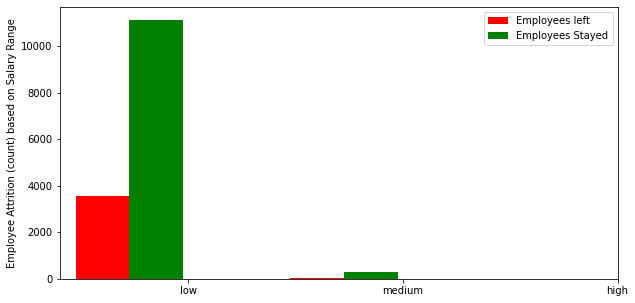

In [19]:
plt.figure(figsize=(10, 5))
plt.bar(X, data_left, color='red', width=0.25)
plt.bar(X+0.25, data_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(sal_ranges))], sal_ranges)
plt.ylabel('Employee Attrition (count) based on Salary Range')
plt.legend(['Employees left', 'Employees Stayed'])

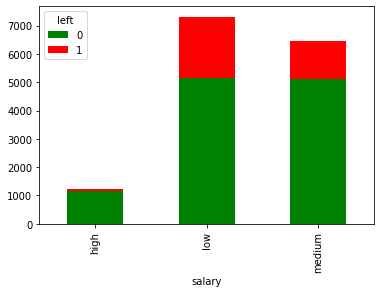

In [26]:
# data_left = [len(data.loc[(data.salary==sal) & (data.left==1)]) for sal in sal_ranges]
pd.crosstab(data.salary, data.left).plot(kind='bar', stacked=True, color=['green','red'])

## Charts indicate,
### Majority of employees getting **Low** & **Medium** Salary, are more likely to leave.

# Attrition Stats. Based on Promotion

In [42]:
promotion_cat = data.promotion_last_5years.unique().tolist()
data_left = [len(data.loc[(data.promotion_last_5years==promo) & (data.left==1)]) for promo in promotion_cat]
data_stay = [len(data.loc[(data.promotion_last_5years==promo) & (data.left==0)]) for promo in promotion_cat]

In [43]:
promotion_cat

[0, 1]

In [44]:
X = np.arange(len(data_left))

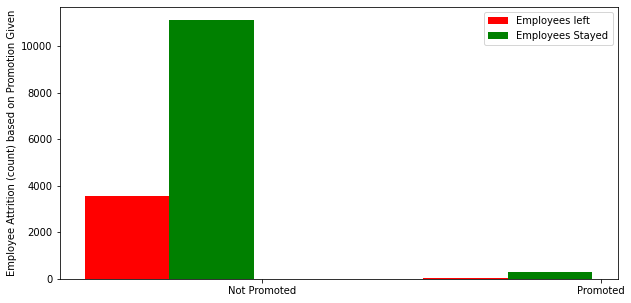

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(X, data_left, color='red', width=0.25)
plt.bar(X+0.25, data_stay, color='green', width=0.25)
promotion_cat = ['Not Promoted', 'Promoted']
plt.xticks([i + 0.4 for i in range(len(promotion_cat))], promotion_cat)
plt.ylabel('Employee Attrition (count) based on Promotion Given')
plt.legend(['Employees left', 'Employees Stayed'])

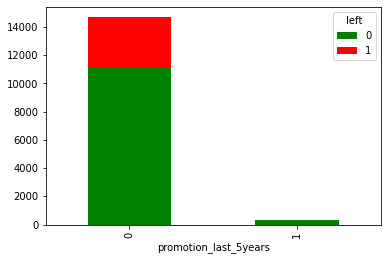

In [47]:
pd.crosstab(data.promotion_last_5years, data.left).plot(kind='bar', stacked=True, color=['green','red'])

## Above Chart indicates
### Inspite of being **Not-Promoted**, Majority of employees still chose to stay rather than leave.

# Attrition Rate by Department

In [ ]:
data_left = data.loc[data.left==1]
data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

# Attrition Rate between Departments

In [48]:
depts = data.Department.unique().tolist()
dept_left = [(len(data.loc[(data.Department==dept) & (data.left==1)])/len(data))*100 for dept in data.Department.unique()]
dept_stay = [(len(data.loc[(data.Department==dept) & (data.left==0)])/len(data))*100 for dept in data.Department.unique()]

In [49]:
X = np.arange(len(dept_left))

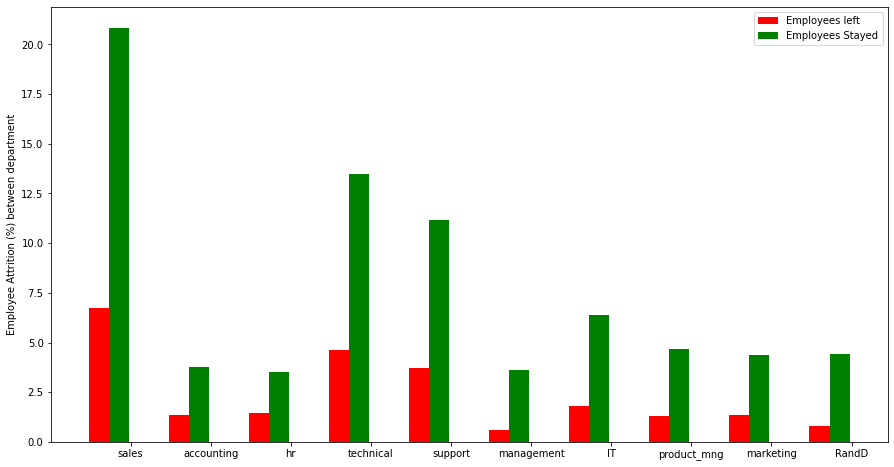

In [51]:
plt.figure(figsize=(15, 8))
plt.bar(X, dept_left, color='red', width=0.25)
plt.bar(X+0.25, dept_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(depts))], depts)
plt.ylabel('Employee Attrition (%) between department')
plt.legend(['Employees left', 'Employees Stayed'])

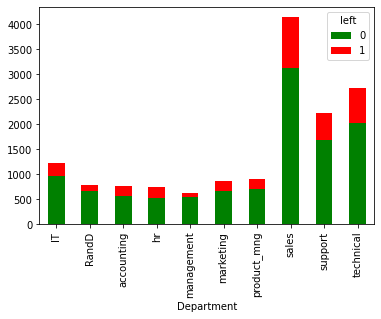

In [56]:
pd.crosstab(data.Department, data.left).plot(kind='bar', stacked=True, color=['green','red'])

## Above chart indicates,
### Attrition is visibly higher in **Sales**, **Technical** and **Support**

In [ ]:
# Attrition Rate Within Departments

In [ ]:
dept_dict = dict()
for dept in data.Department.unique():
  dept_dict[dept] = len(data.loc[data.Department == dept])
dept_dict

{'IT': 1227,
 'RandD': 787,
 'accounting': 767,
 'hr': 739,
 'management': 630,
 'marketing': 858,
 'product_mng': 902,
 'sales': 4140,
 'support': 2229,
 'technical': 2720}

In [ ]:
dept_left = [round((len(data.loc[(data.Department==dept) & (data.left==1)])/dept_dict[dept])*100, 0) for dept in data.Department.unique()]
dept_stay = [round((len(data.loc[(data.Department==dept) & (data.left==0)])/dept_dict[dept])*100, 0) for dept in data.Department.unique()]

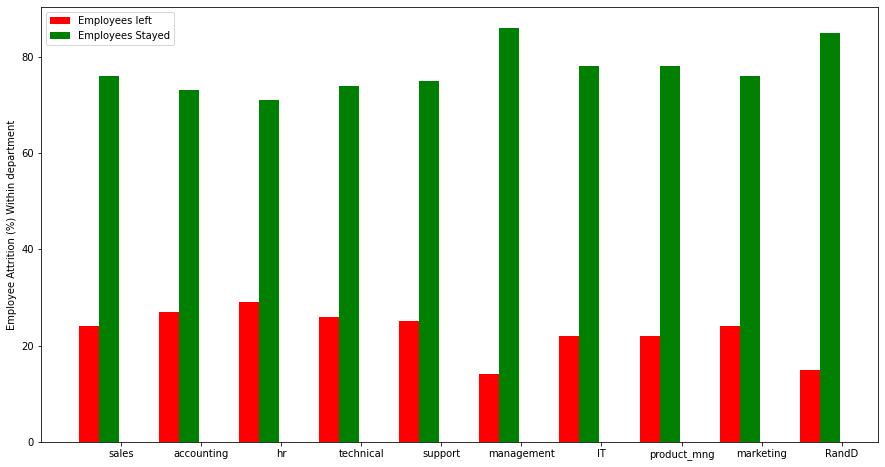

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(X, dept_left, color='red', width=0.25)
plt.bar(X+0.25, dept_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(depts))], depts)
plt.ylabel('Employee Attrition (%) Within department')
plt.legend(['Employees left', 'Employees Stayed'])

In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [149]:
X = data[['number_project', 'time_spend_company', 'Department', 'salary']]
y = data['left'].values.tolist()
X.head()

,number_project,time_spend_company,Department,salary
0,2,3,sales,low
1,5,6,sales,medium
2,7,4,sales,medium
3,5,5,sales,low
4,2,3,sales,low


In [159]:
dup_cols = ['number_project', 'time_spend_company', 'Department', 'salary']
X1 = pd.get_dummies(X, columns=X.columns)
X1.head()

,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_2,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [162]:
X2 = pd.get_dummies(X)
# X2.drop(['number_project', 'time_spend_company', 'Department', 'salary'], axis='columns', inplace=True)
X2.head()

,number_project,time_spend_company,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,2,3,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5,6,0,0,0,0,0,0,0,1,0,0,0,0,1
2,7,4,0,0,0,0,0,0,0,1,0,0,0,0,1
3,5,5,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,3,0,0,0,0,0,0,0,1,0,0,0,1,0


In [123]:
# X.drop(dup_cols, axis='columns', inplace=True)
# X.head()

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X2, y, train_size=0.8)

In [164]:
model = LogisticRegression()

In [165]:
model.fit(X_train, y_train)

LogisticRegression()

In [166]:
X_test

,number_project,time_spend_company,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
11056,5,3,0,0,0,0,0,0,0,0,1,0,0,0,1
5466,3,4,0,0,0,0,0,0,0,0,1,0,0,0,1
2099,5,3,0,0,0,0,0,0,0,0,0,1,0,0,1
2379,5,2,0,0,0,0,0,0,0,1,0,0,0,1,0
9782,3,3,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,4,2,0,0,0,0,1,0,0,0,0,0,0,1,0
3788,3,3,0,0,0,0,0,0,0,0,1,0,0,1,0
167,5,5,0,0,0,0,0,0,0,1,0,0,0,1,0
1891,2,3,0,0,0,0,0,0,0,0,0,1,0,1,0


In [167]:
y_pred = model.predict(X_test)

In [168]:
model.score(X_test, y_test)

0.7506666666666667